Checking the Missing values first

Types of Missing Data

MCAR (Missing Completely at Random)

Missingness has no relationship with any other variable.

Example: A survey response accidentally skipped.

MAR (Missing at Random)

Missingness depends on other observed variables.

Example: Income data missing more often for younger respondents.

MNAR (Missing Not at Random)

Missingness depends on the missing value itself.

Example: People with high income are less likely to report it.

The type affects which handling method is most appropriate.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [73]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


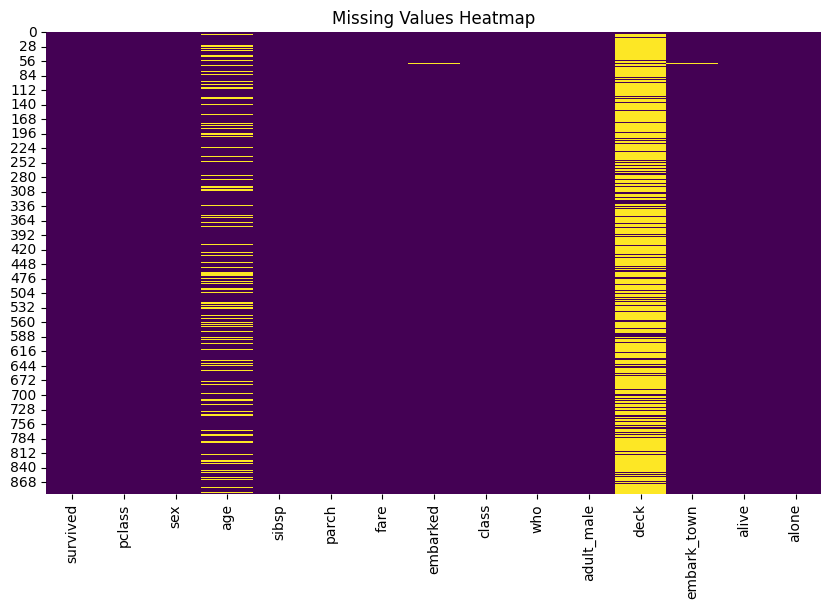

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [52]:
missing_values_count = data.isnull().sum().sort_values(ascending=False)
missing_values_count

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

Handle the missing values for deck, age, embarked, embarked_town

In [55]:
#First we need to check if we need those columns or not

#For Age: We need that column so we will fill the missing values with mean or median
#since the median is less affected by outliers we will use median
data['age'] = data['age'].fillna(data['age'].median()) #we successfully filled the missing values in age column

#For Deck: We can drop that column since it has too many missing values and it will be not useful for our analysis
data = data.drop(columns=['deck']) #we successfully dropped the deck column

#For Embarked: We can fill the missing values with the mode since it is a categorical column
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0]) #we successfully filled the missing values in embarked column

#For Embarked_town: We can fill the missing values with the mode since it is a categorical column
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0]) #we successfully filled the missing values in embark_town


Lets check if all the missing values are handle or not

In [ ]:
data.isnull().sum() #successfully handled all the missing values 

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

Handling Missing values using SK Learn

In [62]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer


# Create an imputer object with a median filling strategy the missing values will be handle by its own column
imputer = SimpleImputer(strategy='median')
data['age'] = imputer.fit_transform(data[['age']])

In [64]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

MultiVariate Imputer

The missing values column will be handle by considering its neighbouring feature/columns as well
And this method is quite better then the simple/single Variate Imputer

In [71]:
from sklearn.experimental import enable_iterative_imputer  # Required to enable
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
data['age'] = imputer.fit_transform(data[['age']])

In [72]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

We can handle the missing values using the techniques called the Forward Fill and Backward Fill

import pandas as pd
import numpy as np

# Example dataset
data = {
    'Age': [25, np.nan, 30, 35, np.nan],
    'Salary': [50000, 60000, np.nan, 80000, 75000]
}

df = pd.DataFrame(data)
print("Original Data:")
print(df)

# Forward fill
df_ffill = df.fillna(method='ffill')
print("\nAfter Forward Fill:")
print(df_ffill)


# Backward fill
df_bfill = df.fillna(method='bfill')
print("\nAfter Backward Fill:")
print(df_bfill)



Handling the missing Values using the KNN Algo

In [74]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
data['age'] = imputer.fit_transform(data[['age']])

In [75]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64



Check missing percentage:

If <5% missing → simple methods (mean/median) often suffice.

If 5–20% → imputation like Iterative Imputer or KNN may be better.

If >50% → consider dropping the feature unless it’s crucial.

Consider your data type:

Numerical → mean/median, iterative, KNN.

Categorical → mode, or predictive imputation.

Consider the model:

Tree-based models (Random Forest, XGBoost) can handle missing values better.

Linear models need proper imputation.

Time series data:

Forward fill, backward fill, or interpolation is often best.